In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

x_train = pd.read_csv("/content/drive/My Drive/data/x_train.csv") # 저장 위치에서 파일 불러오기
x_test = pd.read_csv("/content/drive/My Drive/data/x_test.csv")
y_train = pd.read_csv("/content/drive/My Drive/data/y_train.csv")
y_test = pd.read_csv("/content/drive/My Drive/data/y_test.csv")

In [70]:
params = { 'n_estimators' : [100, 500],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'max_depth' : [8, 10, 12, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# n_jobs = -1 을 지정하면 모든 CPU 코어를 이용해 학습 가능
random_forest = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv_rf = GridSearchCV(random_forest, param_grid = params, cv = 3, n_jobs = -1)
grid_cv_rf.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv_rf.best_params_)
print('최고 예측 정확도: {:.2f}'.format(grid_cv_rf.best_score_ * 100), "%")

최적 하이퍼 파라미터:  {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 500}
최고 예측 정확도: 63.06 %


In [69]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
random_forest_grid = RandomForestClassifier(n_estimators = 50, 
                                max_depth = 20,
                                random_state = 0,
                                max_features = 'auto',
                                n_jobs = -1)

random_forest_grid.fit(x_train, y_train)
random_forest_pred = random_forest_grid.predict(x_test)
random_forest_accuracy_test = accuracy_score(y_test , random_forest_pred)

print('The testing accuracy for Random Forest is: {:.2f}'.format(random_forest_accuracy_test * 100) , "%")

The testing accuracy for Random Forest is: 65.82 %


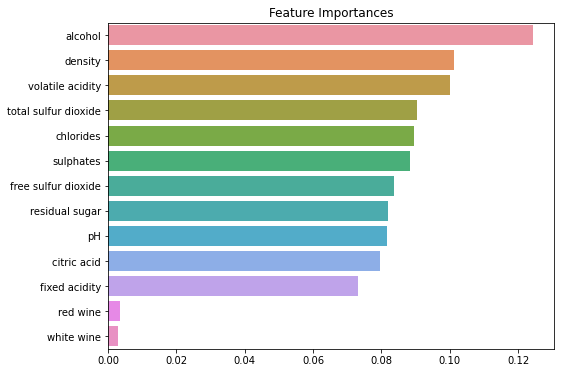

In [82]:
#Random Forest의 각 Feature의 중요도 시각화
ftr_importances_values = random_forest_grid.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)
plt.show()

In [84]:
params_svm = { 'C' : [0.001, 0.01, 0.1, 1, 10, 100],
           'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
            }

# SVM 객체 생성 후 GridSearchCV 수행
# n_jobs = -1 을 지정하면 모든 CPU 코어를 이용해 학습 가능
svm = SVC()
grid_cv_svm = GridSearchCV(svm, param_grid = params_svm, cv = 3, n_jobs = -1)
grid_cv_svm.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv_svm.best_params_)
print('최고 예측 정확도: {:.2f}'.format(grid_cv_svm.best_score_ * 100), "%")

최적 하이퍼 파라미터:  {'C': 10, 'gamma': 100}
최고 예측 정확도: 58.36 %


In [85]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
svm_grid = SVC(C = 10, gamma = 100)

svm_grid.fit(x_train, y_train)
svm_pred = svm_grid.predict(x_test)
svm_accuracy_test = accuracy_score(y_test , svm_pred)

print('The testing accuracy for Random Forest is: {:.2f}'.format(svm_accuracy_test * 100) , "%")

The testing accuracy for Random Forest is: 62.97 %
